In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("./500_Person_Gender_Height_Weight_Index.csv")
data.sample(3)

,Gender,Height,Weight,Index
398,Female,149,61,3
424,Male,174,54,1
458,Male,154,81,4


In [4]:
data.drop("Index", inplace=True, axis=1)
data

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [5]:
data.shape

(500, 3)

In [6]:
data.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [7]:
data["Height"].min()

140

In [8]:
def get_median(series):
    median = None
    ordered = series.sort_values()
    size = len(series)
    if size % 2 == 0:
        median = (ordered[size/2 - 1] + ordered[size/2])/2
    else:
        median =  ordered[size/2]
    return median

med =  get_median(data["Weight"])
med

79.5

In [9]:
data["Weight"].median()

106.0

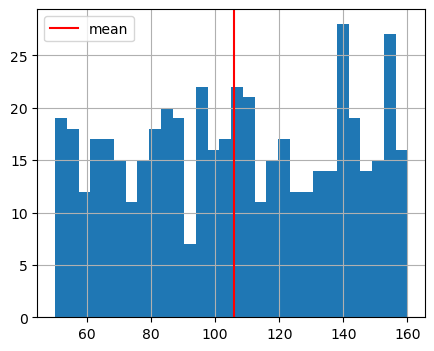

In [10]:
plt.figure(figsize=(5,4))
data["Weight"].hist(bins=30)
plt.axvline(data["Weight"].mean(), color='r', label="mean")
plt.legend()

In [11]:
h = data[["Height"]].copy()
h["c"] = 1
h = h.groupby("Height", as_index=False).count()
h["cc"] = h["c"].cumsum()
h.head(5)

,Height,c,cc
0,140,8,8
1,141,8,16
2,142,9,25
3,143,3,28
4,144,5,33


154.75 -> 184.25: 29.5


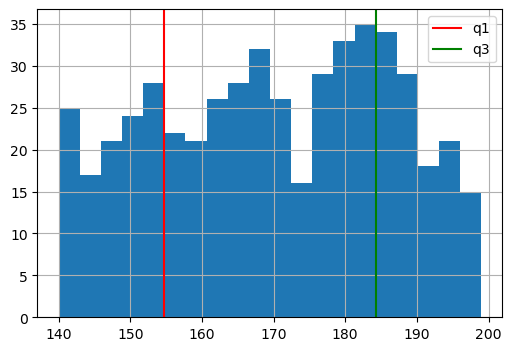

In [12]:
q1 = h["Height"].quantile(.25)
q3 = h["Height"].quantile(.75)
print(f"{q1} -> {q3}: {q3 - q1}")

plt.figure(figsize=(6,4))
data["Height"].hist(bins=20)

plt.axvline(q1, color="r", label="q1")
plt.axvline(q3, color="g", label="q3")

plt.legend()

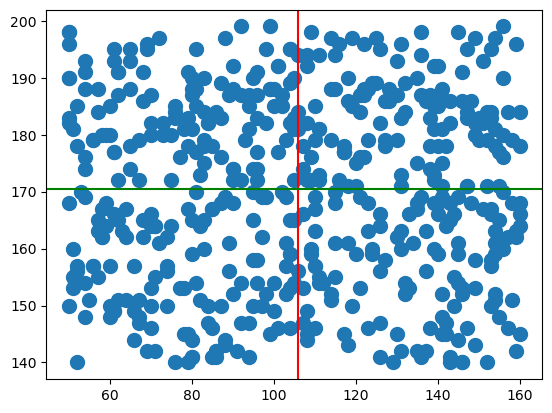

In [13]:
plt.scatter(data["Weight"], data["Height"], s=100)
plt.axvline(data["Weight"].median(), color="r", label="median")
plt.axhline(data["Height"].median(), color="g", label="median")

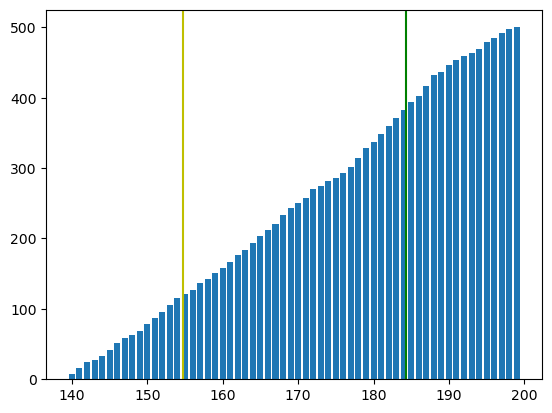

In [14]:
plt.bar(h["Height"], h["cc"])
plt.axvline(q1, color="y", label="q1")
plt.axvline(q3, color="g", label="q3")

In [15]:
data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


<function matplotlib.pyplot.show(close=None, block=None)>

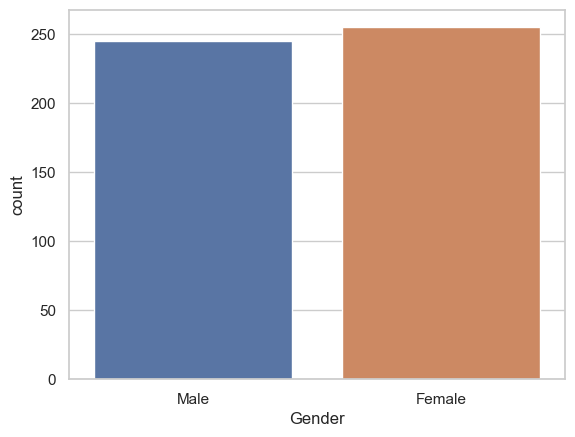

In [16]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(x=data["Gender"])
plt.show

<Axes: title={'center': 'heights'}, ylabel='Frequency'>

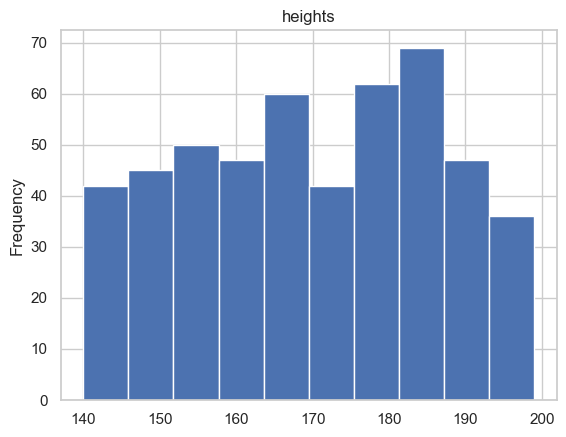

In [17]:
data["Height"].plot(kind="hist", title="heights")

<Axes: title={'center': 'Boxplot'}>

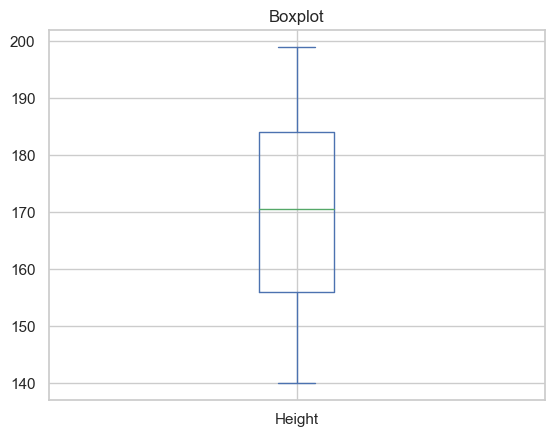

In [18]:
data["Height"].plot(kind="box", title="Boxplot")

<Axes: ylabel='Density'>

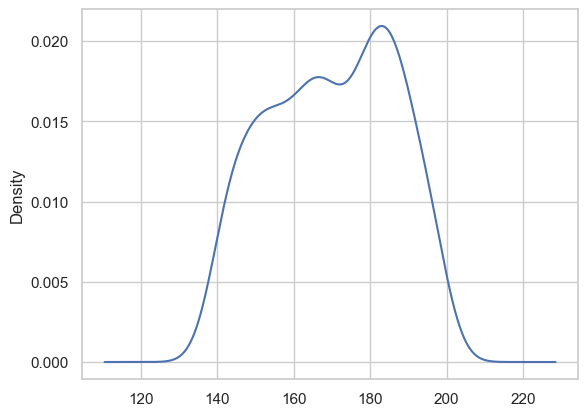

In [19]:
data["Height"].plot(kind="kde")

<Axes: xlabel='Height', ylabel='Weight'>

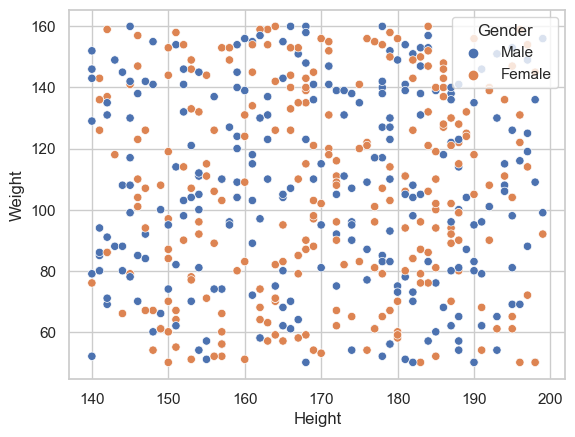

In [20]:
sns.scatterplot(x ="Height", y="Weight", data=data, hue="Gender")

c:\Users\bigworker\anaconda3\envs\tutorials\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\bigworker\anaconda3\envs\tutorials\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


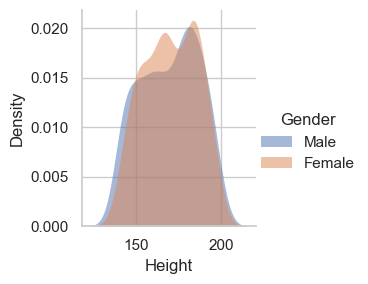

In [41]:
g = sns.FacetGrid(data, hue="Gender")
g.map(sns.kdeplot, "Height", fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)
g.add_legend()